<a href="https://colab.research.google.com/github/vunnampragathi/projects/blob/main/src/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.metrics import accuracy_score, confusion_matrix
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [70]:
COL_LIST = ['State','Date Local','NO2 AQI','NO2 Mean','O3 AQI','O3 Mean','CO AQI','CO Mean','SO2 AQI','SO2 Mean']

In [71]:
data = pd.read_csv("/content/uspollution_pollution_us_2000_2016.csv",usecols =COL_LIST )

In [72]:
data

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
0,Arizona,2000-01-01,19.041667,46,0.022500,34,3.000000,13.0,1.145833,NaN
1,Arizona,2000-01-01,19.041667,46,0.022500,34,3.000000,13.0,0.878947,25.0
2,Arizona,2000-01-01,19.041667,46,0.022500,34,2.975000,NaN,1.145833,NaN
3,Arizona,2000-01-01,19.041667,46,0.022500,34,2.975000,NaN,0.878947,25.0
4,Arizona,2000-01-02,22.958333,34,0.013375,27,1.958333,4.0,0.850000,NaN
...,...,...,...,...,...,...,...,...,...,...
1746656,Wyoming,2016-03-30,1.083333,1,0.043917,44,0.000000,NaN,0.091667,1.0
1746657,Wyoming,2016-03-31,0.939130,1,0.045263,44,-0.022727,0.0,0.067714,NaN
1746658,Wyoming,2016-03-31,0.939130,1,0.045263,44,-0.022727,0.0,0.100000,1.0
1746659,Wyoming,2016-03-31,0.939130,1,0.045263,44,0.000000,NaN,0.067714,NaN


In [73]:
df=data.fillna(method='ffill')
df

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
0,Arizona,2000-01-01,19.041667,46,0.022500,34,3.000000,13.0,1.145833,NaN
1,Arizona,2000-01-01,19.041667,46,0.022500,34,3.000000,13.0,0.878947,25.0
2,Arizona,2000-01-01,19.041667,46,0.022500,34,2.975000,13.0,1.145833,25.0
3,Arizona,2000-01-01,19.041667,46,0.022500,34,2.975000,13.0,0.878947,25.0
4,Arizona,2000-01-02,22.958333,34,0.013375,27,1.958333,4.0,0.850000,25.0
...,...,...,...,...,...,...,...,...,...,...
1746656,Wyoming,2016-03-30,1.083333,1,0.043917,44,0.000000,0.0,0.091667,1.0
1746657,Wyoming,2016-03-31,0.939130,1,0.045263,44,-0.022727,0.0,0.067714,1.0
1746658,Wyoming,2016-03-31,0.939130,1,0.045263,44,-0.022727,0.0,0.100000,1.0
1746659,Wyoming,2016-03-31,0.939130,1,0.045263,44,0.000000,0.0,0.067714,1.0


In [74]:
df=df.fillna(method='bfill')

In [75]:
df

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
0,Arizona,2000-01-01,19.041667,46,0.022500,34,3.000000,13.0,1.145833,25.0
1,Arizona,2000-01-01,19.041667,46,0.022500,34,3.000000,13.0,0.878947,25.0
2,Arizona,2000-01-01,19.041667,46,0.022500,34,2.975000,13.0,1.145833,25.0
3,Arizona,2000-01-01,19.041667,46,0.022500,34,2.975000,13.0,0.878947,25.0
4,Arizona,2000-01-02,22.958333,34,0.013375,27,1.958333,4.0,0.850000,25.0
...,...,...,...,...,...,...,...,...,...,...
1746656,Wyoming,2016-03-30,1.083333,1,0.043917,44,0.000000,0.0,0.091667,1.0
1746657,Wyoming,2016-03-31,0.939130,1,0.045263,44,-0.022727,0.0,0.067714,1.0
1746658,Wyoming,2016-03-31,0.939130,1,0.045263,44,-0.022727,0.0,0.100000,1.0
1746659,Wyoming,2016-03-31,0.939130,1,0.045263,44,0.000000,0.0,0.067714,1.0


In [76]:
df1=df.loc[df['State'] == "California"]

In [77]:
df1

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
3516,California,2000-01-01,14.782609,25,0.015542,25,0.636364,3.0,0.556522,22.0
3517,California,2000-01-01,14.782609,25,0.015542,25,0.636364,3.0,0.572222,9.0
3518,California,2000-01-01,14.782609,25,0.015542,25,0.600000,3.0,0.556522,9.0
3519,California,2000-01-01,14.782609,25,0.015542,25,0.600000,3.0,0.572222,9.0
3520,California,2000-01-02,16.043478,28,0.015292,27,1.000000,3.0,0.578261,9.0
...,...,...,...,...,...,...,...,...,...,...
1729192,California,2016-04-29,3.643478,8,0.032417,35,0.457143,0.0,0.262500,3.0
1729193,California,2016-04-30,4.160870,12,0.038053,38,0.468182,0.0,0.247826,3.0
1729194,California,2016-04-30,4.160870,12,0.038053,38,0.468182,0.0,0.245833,3.0
1729195,California,2016-04-30,4.160870,12,0.038053,38,0.442857,0.0,0.247826,3.0


In [78]:
df1.drop_duplicates(subset=['Date Local'], inplace=True)    # deleting the repeated date local values
df1

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
3516,California,2000-01-01,14.782609,25,0.015542,25,0.636364,3.0,0.556522,22.0
3520,California,2000-01-02,16.043478,28,0.015292,27,1.000000,3.0,0.578261,9.0
3524,California,2000-01-03,25.521739,38,0.005625,12,2.454545,6.0,1.313043,9.0
3528,California,2000-01-04,26.041667,42,0.006083,9,1.541667,6.0,1.187500,22.0
3532,California,2000-01-05,23.772727,36,0.010500,19,1.681818,6.0,1.136364,23.0
...,...,...,...,...,...,...,...,...,...,...
1724161,California,2016-04-30,8.434783,23,0.032158,36,0.900000,1.0,0.339130,5.0
1724477,California,2016-03-19,2.982609,3,0.027708,31,0.372727,0.0,0.400000,6.0
1724481,California,2016-03-20,2.269565,7,0.026625,30,0.359091,0.0,0.391304,5.0
1724485,California,2016-03-21,3.552174,6,0.034208,39,0.390909,0.0,0.395652,5.0


The pollutant with the highest AQI value determines the overall AQI for that hour.

ref:https://www.pca.state.mn.us/air-water-land-climate/understanding-the-air-quality-index-aqi#:~:text=The%20AQI%20is%20calculated%20by,National%20Ambient%20Air%20Quality%20Standards.

In [79]:
df1["AQI"] = df1.max(axis=1)
df1

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,AQI
3516,California,2000-01-01,14.782609,25,0.015542,25,0.636364,3.0,0.556522,22.0,25.0
3520,California,2000-01-02,16.043478,28,0.015292,27,1.000000,3.0,0.578261,9.0,28.0
3524,California,2000-01-03,25.521739,38,0.005625,12,2.454545,6.0,1.313043,9.0,38.0
3528,California,2000-01-04,26.041667,42,0.006083,9,1.541667,6.0,1.187500,22.0,42.0
3532,California,2000-01-05,23.772727,36,0.010500,19,1.681818,6.0,1.136364,23.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...
1724161,California,2016-04-30,8.434783,23,0.032158,36,0.900000,1.0,0.339130,5.0,36.0
1724477,California,2016-03-19,2.982609,3,0.027708,31,0.372727,0.0,0.400000,6.0,31.0
1724481,California,2016-03-20,2.269565,7,0.026625,30,0.359091,0.0,0.391304,5.0,30.0
1724485,California,2016-03-21,3.552174,6,0.034208,39,0.390909,0.0,0.395652,5.0,39.0


In [80]:
def AQI_Range(x):
  if x<=50:
    return "Good"
  elif x>50 and x<=100:return "Moderate"
  elif x>100 and x<=200:return "Poor"
  elif x>200 and x<=300:return "Unhealthy"
  elif x>300 and x<=400:return "Very unhealthy"
  elif x>400:return "Hazardous"
df1['AQI Range'] = df1['AQI'] .apply(AQI_Range)
df1.head()

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,AQI,AQI Range
3516,California,2000-01-01,14.782609,25,0.015542,25,0.636364,3.0,0.556522,22.0,25.0,Good
3520,California,2000-01-02,16.043478,28,0.015292,27,1.000000,3.0,0.578261,9.0,28.0,Good
3524,California,2000-01-03,25.521739,38,0.005625,12,2.454545,6.0,1.313043,9.0,38.0,Good
3528,California,2000-01-04,26.041667,42,0.006083,9,1.541667,6.0,1.187500,22.0,42.0,Good
3532,California,2000-01-05,23.772727,36,0.010500,19,1.681818,6.0,1.136364,23.0,36.0,Good


In [81]:
x=df1[['NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
y=df1[['AQI']]
x.head()

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
3516,25,25,3.0,22.0
3520,28,27,3.0,9.0
3524,38,12,6.0,9.0
3528,42,9,6.0,22.0
3532,36,19,6.0,23.0


In [82]:
y.head()

,AQI
3516,25.0
3520,28.0
3524,38.0
3528,42.0
3532,36.0


In [83]:
X_train,X_test,Y_train,Y_test=train_test_split(x, y, test_size=0.2, random_state=70)
print(X_train.shape, X_test. shape,Y_train. shape, Y_test.shape)
#splitting the data into training and testing data

(4772, 4) (1193, 4) (4772, 1) (1193, 1)


# Regression models

# linear regression

In [84]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [85]:

test_pred=model.predict(X_test)

In [86]:

RMSE_test =(np.sqrt(metrics.mean_squared_error(Y_test, test_pred))) 
print("RMSE TestData= ", str(RMSE_test))


RMSE TestData=  5.0382941283093885


# logistic Regression

In [87]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [88]:

test_pred=model.predict(X_test)

In [89]:

RMSE_test =(np.sqrt(metrics.mean_squared_error(Y_test, test_pred))) 
print("RMSE TestData= ", str(RMSE_test))

RMSE TestData=  11.542987914384117


# Decision Tree Regressor

In [90]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [91]:

test_pred=DT.predict(X_test)

In [92]:

RMSE_test =(np.sqrt(metrics.mean_squared_error(Y_test, test_pred))) 
print("RMSE TestData=",str(RMSE_test))

RMSE TestData= 2.46484077925083


# Random Forest Regressor

In [93]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)
test_pred=RF.predict(X_test)

In [94]:

RMSE_test= (np.sqrt(metrics.mean_squared_error(Y_test, test_pred)))
print("RMSE TestData=", str(RMSE_test))


RMSE TestData= 2.4219191852362854


# Time Series Models

In [95]:

new=['Date Local','AQI']
df2=df1[new]
df2

,Date Local,AQI
3516,2000-01-01,25.0
3520,2000-01-02,28.0
3524,2000-01-03,38.0
3528,2000-01-04,42.0
3532,2000-01-05,36.0
...,...,...
1724161,2016-04-30,36.0
1724477,2016-03-19,31.0
1724481,2016-03-20,30.0
1724485,2016-03-21,39.0


In [96]:
# When fitting the data to time series models, use the dataset's date as the index.
df3=df2.set_index('Date Local')
df3=df3[["AQI"]]
df3

,AQI
Date Local,
2000-01-01,25.0
2000-01-02,28.0
2000-01-03,38.0
2000-01-04,42.0
2000-01-05,36.0
...,...
2016-04-30,36.0
2016-03-19,31.0
2016-03-20,30.0


checking whether the data is stationary or not using ADF test.

In [97]:
stat_test = adfuller(df3['AQI'])
print('The test statistic for AQI is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistic for AQI is -7.178090091476675 and p-value is 2.694205052344708e-10


p value is less than 0.05. it indicates that the data is stationary.



now we need to find the lag value for fitting the data into ARIMA model.


The autocorrelation function can be used to calculate the lag value for a moving average, and the partial auto correlation function can be used to calculate the lag value for an auto regression.

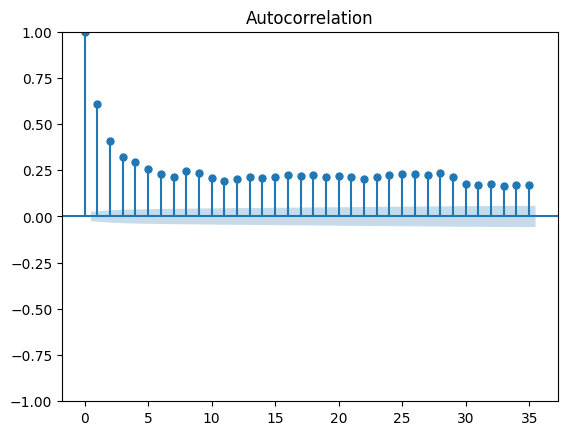

In [98]:
sm.graphics.tsa.plot_acf(df3['AQI'], lags=35);

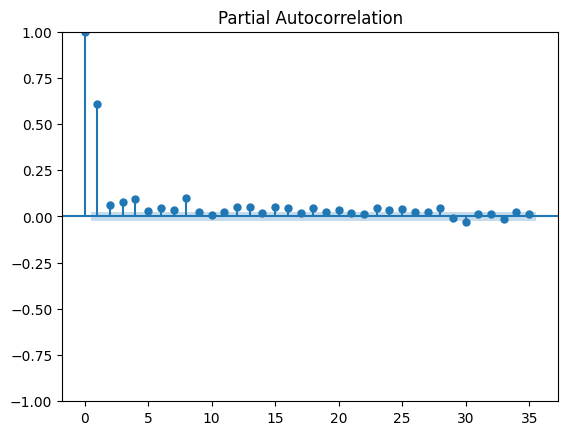

In [99]:
sm.graphics.tsa.plot_pacf(df3['AQI'], lags=35);
     

In [100]:
# splitting the data into train and test
train_len = int(len(df3['AQI']) * 0.8)
df_train = df3[:train_len]
df_test = df3['AQI'][train_len:]
start = len(df_train)
end = len(df_train) + len(df_test) - 1

# Moving Average

In [101]:
ma_model = ARIMA(df_train, order=(0, 0, 5))
ma_result = ma_model.fit()

In [102]:
ma_pred = ma_result.predict(start, end)
rmse_ma = np.sqrt(mean_squared_error(df_test, ma_pred))
print("rmse:",rmse_ma)

rmse: 8.126675212582144


moving average prediction of 


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

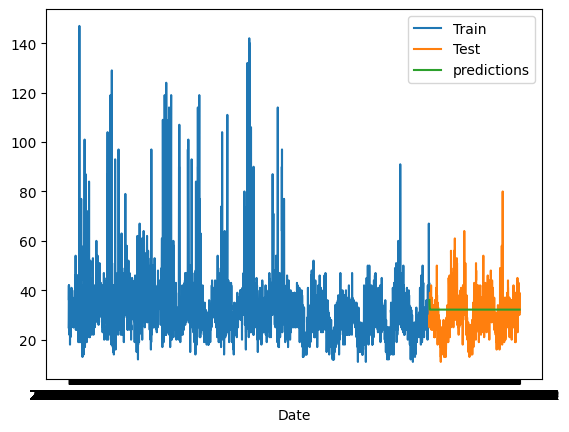

In [103]:

ma_pred.index = df_test.index
plt.plot(df_train.index, df_train, label='Train')
plt.plot(df_test.index, df_test, label='Test')
plt.plot(ma_pred.index , ma_pred, label='predictions')
print('moving average prediction of ')
    
plt.legend()
plt.xlabel('Date')
plt
    

# Auto Regression Model

In [104]:
ar_model = ARIMA(df_train, order=(5, 0, 0))
ar_result = ar_model.fit()

In [105]:
ar_pred = ar_result.predict(start, end)
rmse_ar = np.sqrt(mean_squared_error(df_test, ar_pred))
print("rmse:",rmse_ar)

rmse: 8.129518650153335


# ARIMA

In [106]:
arima_model = ARIMA(df_train, order=(5, 1, 8))
arima_result = arima_model.fit()

In [107]:
arima_pred = arima_result.predict(start, end)
rmse_arima = np.sqrt(mean_squared_error(df_test, arima_pred))
print("rmse:",rmse_arima)

rmse: 8.512519269081547


ARIMA prediction of AQI


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

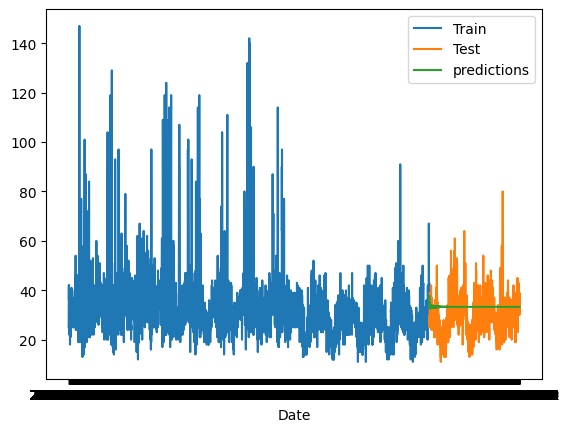

In [108]:
arima_pred.index = df_test.index
plt.plot(df_train.index, df_train, label='Train')
plt.plot(df_test.index, df_test, label='Test')
plt.plot(arima_pred.index , arima_pred, label='predictions')
print('ARIMA prediction of AQI')
    
plt.legend()
plt.xlabel('Date')
plt

The ARIMA model is shown to have a lower RMSE value when the RMSE values of the AR,MA and ARIMA models are compared.Forecasting works best with ARIMA.

In [111]:
forecast_index = pd.date_range(df_test.index[-1], periods=10)
arima_forecast = arima_result.forecast(steps=10)
arima_forecast.index = forecast_index
print(arima_forecast)

2016-03-22    37.660764
2016-03-23    36.274803
2016-03-24    34.277367
2016-03-25    34.122585
2016-03-26    33.844457
2016-03-27    34.882267
2016-03-28    33.251475
2016-03-29    33.067894
2016-03-30    33.737196
2016-03-31    33.951037
Freq: D, Name: predicted_mean, dtype: float64
